## Data Preparation

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_excel(r'D:\supermarket data\Supermarket Data.xlsx') 

In [3]:
df.head 

<bound method NDFrame.head of      supermarket  no_of_items  variation   total  paid  change   type food  \
0         acacia            1          1    90.0   100    10.0   cash  yes   
1         acacia            1          1    90.0   500   410.0   cash  yes   
2         acacia            3          1   270.0   300    30.0   cash  yes   
3         acacia            3          1   137.0   200    63.0   cash  yes   
4         acacia            1          1    75.0    80     5.0   cash  yes   
...          ...          ...        ...     ...   ...     ...    ...  ...   
1371    nakumatt            3          2   325.0  1000   675.0   cash   no   
1372      uchumi            1          1    70.0   200   130.0   cash   no   
1373      tuskys            2          3  1230.0  1230     0.0  mpesa  yes   
1374    nakumatt            2          3   516.0   516     0.0   card  yes   
1375      tuskys            2          1   290.0   500   210.0   cash  yes   

     snack beverage  ...  time_ty

In [4]:
file_path = 'D:\supermarket data\Supermarket Data.xlsx'
excel_data = pd.ExcelFile(file_path)

In [5]:
sheet_names = excel_data.sheet_names
sheet_names, excel_data.parse(sheet_names[0],[1]).head() 


(['aggregate', 'categorization', 'market'],
      acacia   1  1.1      90   100     10  cash  yes  no no.1  ...      night  \
 0    acacia   1    1    90.0   500  410.0  cash  yes  no   no  ...      night   
 1    acacia   3    1   270.0   300   30.0  cash  yes  no   no  ...      night   
 2    acacia   3    1   137.0   200   63.0  cash  yes  no   no  ...      night   
 3    acacia   1    1    75.0    80    5.0  cash  yes  no   no  ...  afternoon   
 4  nakumatt  22    3  5611.0  5611    0.0  card  yes  no   no  ...  afternoon   
 
    small  saika  mid   saturday  weekend no.7  20   5    2017  
 0  small  saika  mid   saturday  weekend   no  20   5  2017.0  
 1  small  saika  mid   saturday  weekend   no  20   5  2017.0  
 2  small  saika  mid   saturday  weekend   no  20   5  2017.0  
 3  small  saika  mid   saturday  weekend   no  20   5  2017.0  
 4  chain    cbd  mid  wednesday  weekday  yes  24  12  2016.0  
 
 [5 rows x 27 columns])

In [6]:
# Load the first sheet's data for cleaning
data = excel_data.parse(sheet_names[2])
# Check for missing values
missing_data_summary = data.isnull().sum()

# Drop rows where all data is missing or blank
cleaned_data = data.dropna(how='all')
# Fill any missing numeric data with 0 and categorical with 'Unknown'
cleaned_data.fillna({'no_of_items': 0, 'variation': 0, 'total': 0, 'paid': 0, 'change': 0,
                     'supermarket': 'Unknown', 'type food': 'Unknown', 'snack': 'Unknown', 
                     'beverage': 'Unknown', 'location': 'Unknown', 'loc_category': 'Unknown', 
                     'day': 'Unknown', 'day_type': 'Unknown', 'time_type': 'Unknown', 
                     'type_market': 'Unknown', 'month': 0, 'year': 0}, inplace=True)

# Get the summary after cleaning
missing_data_after_cleaning = cleaned_data.isnull().sum()
cleaned_data_info = cleaned_data.info()

missing_data_summary, missing_data_after_cleaning, cleaned_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   supermarket   1464 non-null   object 
 1   no_of_items   1464 non-null   int64  
 2   variation     1464 non-null   int64  
 3   total         1464 non-null   float64
 4   paid          1464 non-null   int64  
 5   change        1464 non-null   float64
 6   type          1464 non-null   object 
 7   food          1464 non-null   object 
 8   snack         1464 non-null   object 
 9   beverage      1464 non-null   object 
 10  consumables   1464 non-null   object 
 11  high_end      1464 non-null   object 
 12  asset         1464 non-null   object 
 13  fixed_asset   1464 non-null   object 
 14  date          1464 non-null   object 
 15  mall          1464 non-null   object 
 16  time          1464 non-null   object 
 17  time_type     1464 non-null   object 
 18  type_market   1464 non-null 

(supermarket     1
 no_of_items     0
 variation       0
 total           0
 paid            0
 change          0
 type            0
 food            0
 snack           0
 beverage        0
 consumables     0
 high_end        0
 asset           0
 fixed_asset     0
 date            0
 mall            0
 time            0
 time_type       0
 type_market     0
 location        0
 loc_category    0
 day             0
 day_type        0
 24hr            0
 day_1           0
 month           0
 year            2
 hour            0
 item_no_cat     0
 total_cat       0
 paid_cat        0
 change_cat      0
 dtype: int64,
 supermarket     0
 no_of_items     0
 variation       0
 total           0
 paid            0
 change          0
 type            0
 food            0
 snack           0
 beverage        0
 consumables     0
 high_end        0
 asset           0
 fixed_asset     0
 date            0
 mall            0
 time            0
 time_type       0
 type_market     0
 location       

In [7]:
print(data.isnull().sum())


supermarket     1
no_of_items     0
variation       0
total           0
paid            0
change          0
type            0
food            0
snack           0
beverage        0
consumables     0
high_end        0
asset           0
fixed_asset     0
date            0
mall            0
time            0
time_type       0
type_market     0
location        0
loc_category    0
day             0
day_type        0
24hr            0
day_1           0
month           0
year            2
hour            0
item_no_cat     0
total_cat       0
paid_cat        0
change_cat      0
dtype: int64


In [8]:
# Drop rows where 'year' is missing
cleaned_data = data.dropna(subset=['year'])

# Fill missing values in 'supermarket'
cleaned_data['supermarket'] = cleaned_data['supermarket'].fillna("chandarana")

# Fill missing values in 'year' 
cleaned_data['year'] = cleaned_data['year'].fillna(2020)

# Check if any missing values remain
print(cleaned_data.isnull().sum())


supermarket     0
no_of_items     0
variation       0
total           0
paid            0
change          0
type            0
food            0
snack           0
beverage        0
consumables     0
high_end        0
asset           0
fixed_asset     0
date            0
mall            0
time            0
time_type       0
type_market     0
location        0
loc_category    0
day             0
day_type        0
24hr            0
day_1           0
month           0
year            0
hour            0
item_no_cat     0
total_cat       0
paid_cat        0
change_cat      0
dtype: int64


C:\Users\JOSHUA\AppData\Local\Temp\ipykernel_5164\994041329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['supermarket'] = cleaned_data['supermarket'].fillna("chandarana")
C:\Users\JOSHUA\AppData\Local\Temp\ipykernel_5164\994041329.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['year'] = cleaned_data['year'].fillna(2020)


In [9]:
# Save cleaned data as an Excel file
cleaned_file_path = "D:/supermarket data/Cleaned_Supermarket_Data.xlsx" 
cleaned_data.to_excel(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")


C:\Users\JOSHUA\AppData\Local\Temp\ipykernel_5164\264590048.py:3: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  cleaned_data.to_excel(cleaned_file_path, index=False)


Cleaned dataset saved to D:/supermarket data/Cleaned_Supermarket_Data.xlsx


## Univariate Analysis

In [10]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [11]:

df = pd.read_excel(r"D:\supermarket data\Cleaned Supermarket Data.xlsx")


In [12]:
df.head()

,supermarket,no_of_items,variation,total,paid,change,Payment Method,food,snack,beverage,...,day,day_type,24hr,day_1,month,year,Gender,Weekly_Income_in_`000 (ksh),Spending_Score_(1-100),Age
0,nakumatt,1,1,2560,2460,-100,card,0,0,0,...,friday,weekday,no,11,11,2016,Male,15.0,39.0,19.0
1,nakumatt,12,5,2580,4926,2346,card,1,1,1,...,friday,weekday,no,11,11,2016,Male,15.0,81.0,21.0
2,nakumatt,5,1,2397,5500,3103,mpesa,1,1,1,...,friday,weekday,no,13,1,2017,Female,16.0,6.0,20.0
3,naivas,1,1,2561,100,-2461,cash,0,0,1,...,friday,weekday,no,19,5,2017,Female,16.0,77.0,23.0
4,naivas,1,1,2598,70,-2528,cash,0,0,1,...,friday,weekday,no,19,5,2017,Female,17.0,40.0,31.0


In [13]:
df.describe()

,no_of_items,variation,total,paid,change,food,snack,beverage,consumables,electronic & appliances,date,day_1,month,year,Weekly_Income_in_`000 (ksh),Spending_Score_(1-100),Age
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376,1376.000000,1376.000000,1376.000000,200.000000,200.000000,200.000000
mean,5.193314,1.746366,2547.377180,468.374273,-2079.002907,0.487645,0.334302,0.346657,0.214390,0.090843,2017-06-20 15:00:00,18.767442,5.779070,2017.023983,60.560000,50.200000,38.850000
min,1.000000,1.000000,100.000000,1.000000,-5900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013-06-23 00:00:00,3.000000,1.000000,2013.000000,15.000000,1.000000,18.000000
25%,1.000000,1.000000,2435.000000,100.000000,-2385.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-05-23 00:00:00,11.000000,5.000000,2017.000000,41.500000,34.750000,28.750000
50%,2.000000,1.000000,2471.000000,200.000000,-2274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-05-23 00:00:00,23.000000,5.000000,2017.000000,61.500000,50.000000,36.000000
75%,5.000000,2.000000,2535.250000,500.000000,-1946.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2017-08-09 00:00:00,23.000000,8.000000,2017.000000,78.000000,73.000000,49.000000
max,33.000000,6.000000,6000.000000,17350.000000,14756.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2023-05-23 00:00:00,31.000000,12.000000,2023.000000,137.000000,99.000000,70.000000
std,6.871632,0.958211,403.344856,978.067660,1070.777237,0.500029,0.471918,0.476078,0.410547,0.287490,NaN,6.979637,1.913937,0.424871,26.264721,25.823522,13.969007


<Axes: xlabel='Weekly_Income_in_`000 (ksh)', ylabel='Density'>

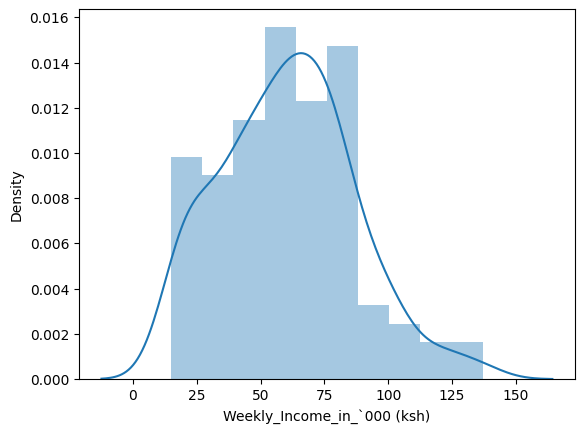

In [14]:
sns.distplot(df['Weekly_Income_in_`000 (ksh)'])

In [15]:
df.columns

Index(['supermarket', 'no_of_items', 'variation', 'total', 'paid', 'change',
       'Payment Method', 'food', 'snack', 'beverage', 'consumables',
       'electronic & appliances', 'date', 'mall', 'time', 'time_type',
       'type_market', 'location', 'loc_category', 'day', 'day_type', '24hr',
       'day_1', 'month', 'year', 'Gender', 'Weekly_Income_in_`000 (ksh)',
       'Spending_Score_(1-100)', 'Age'],
      dtype='object')

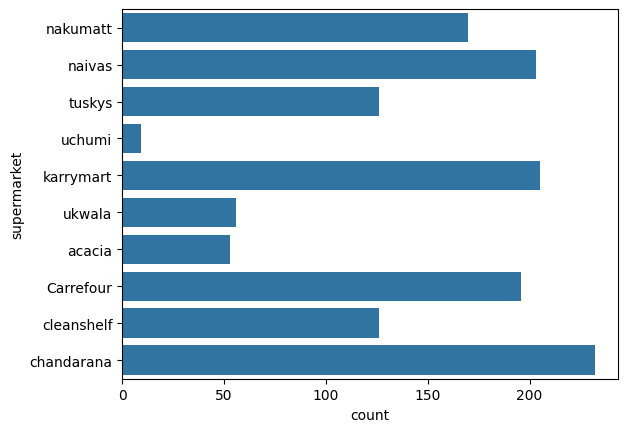

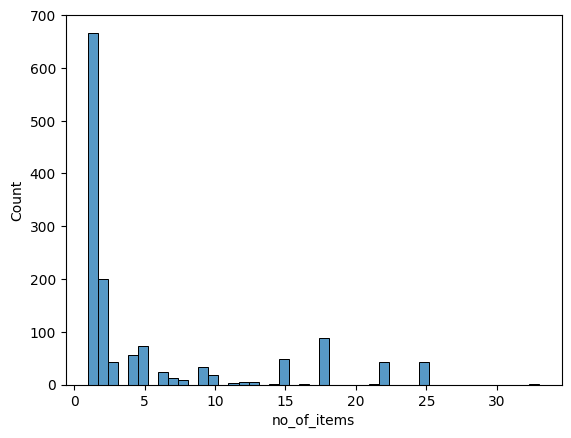

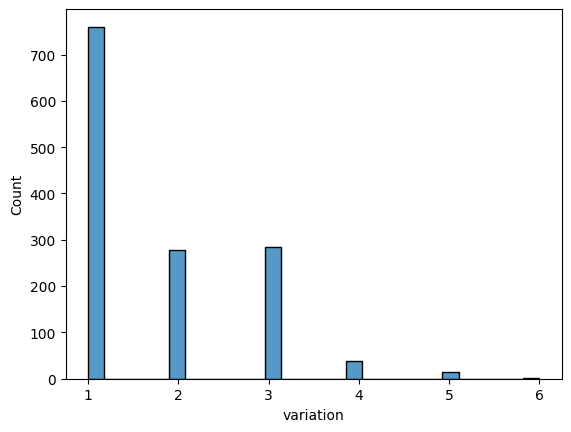

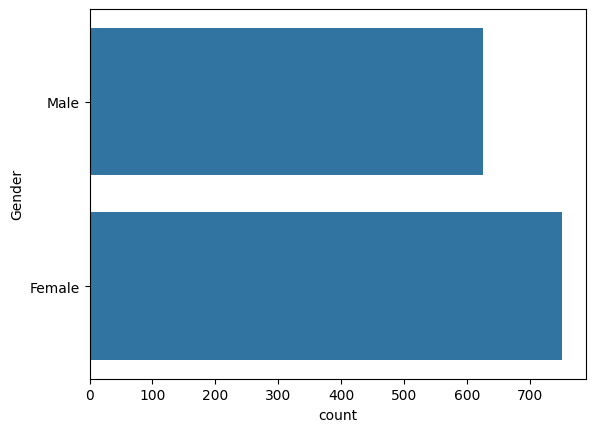

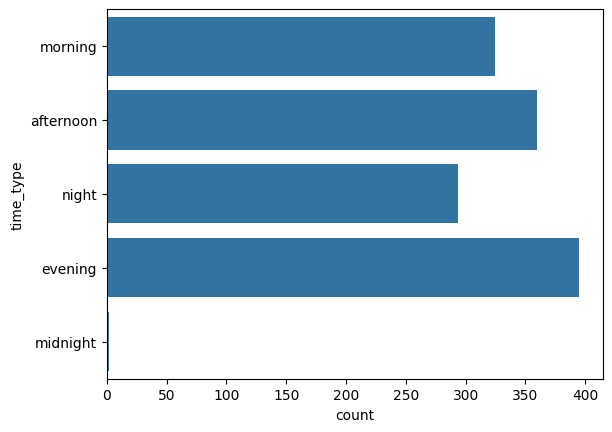

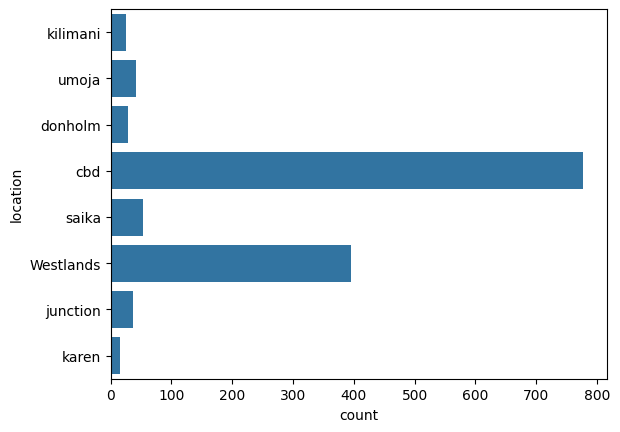

In [16]:
columns = ['supermarket', 'no_of_items', 'variation','Gender','time_type' ,'location' ]

for i in columns:
    plt.figure()
    if df[i].dtype in ['int64', 'float64']:  # For numerical columns
        sns.histplot(df[i])
    else:  # For categorical columns
        sns.countplot(y=df[i])  # Use countplot for categorical variables

plt.show()

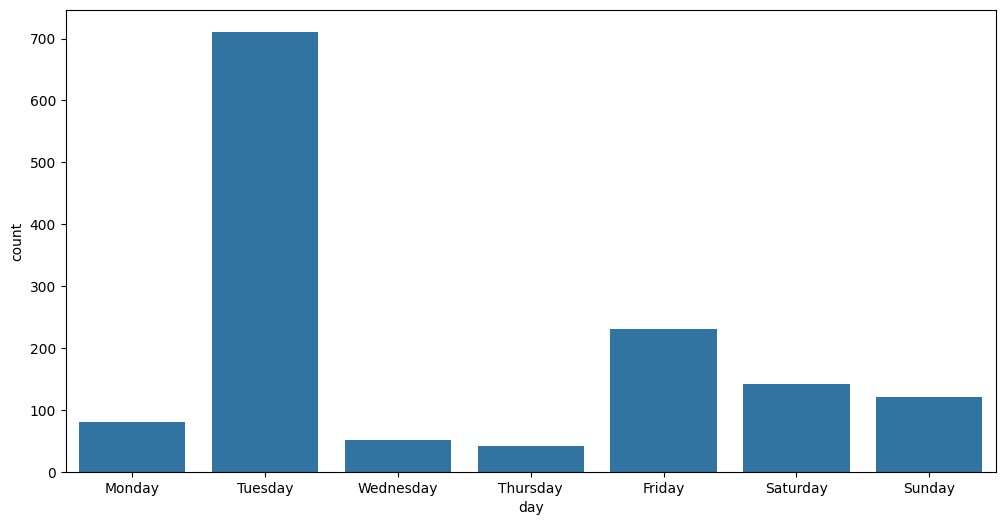

In [17]:
# Strip spaces and ensure all days are capitalized uniformly
df['day'] = df['day'].str.strip().str.capitalize()

# Define the correct order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'day' column to a categorical type with the correct order
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)

# Plot the count plot with the correct day order
plt.figure(figsize=(12, 6))
sns.countplot(x='day', data=df, order=day_order)

plt.show()


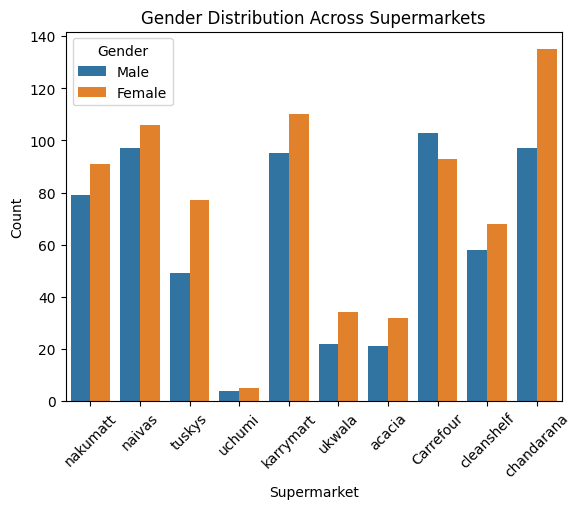

In [18]:
# Create a count plot to visualize the relationship between gender and supermarket
sns.countplot(data=df, x='supermarket', hue='Gender')

plt.title("Gender Distribution Across Supermarkets")
plt.xlabel("Supermarket")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

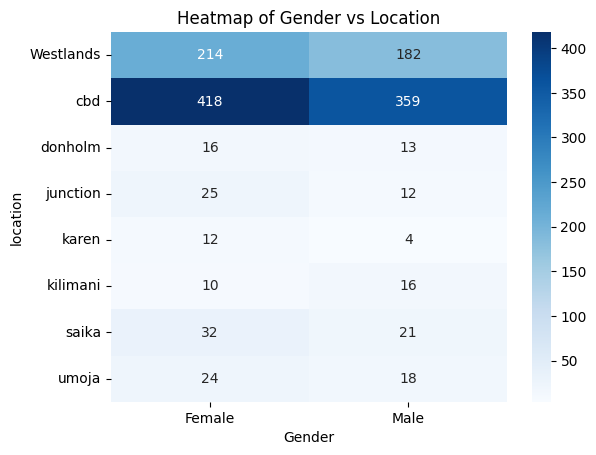

In [19]:
gender_location_pivot = df.pivot_table(index='location', columns='Gender', aggfunc='size', fill_value=0)
sns.heatmap(gender_location_pivot, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Gender vs Location')
plt.show()


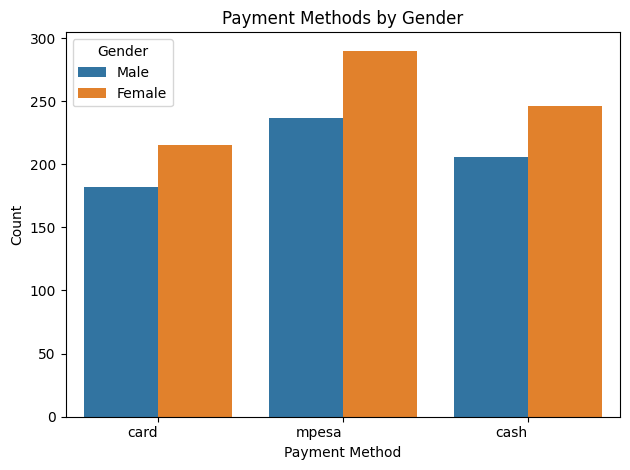

In [20]:
sns.countplot(data=df, x='Payment Method', hue='Gender')


plt.title('Payment Methods by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')

plt.xticks( ha='right')

plt.tight_layout()
plt.show()

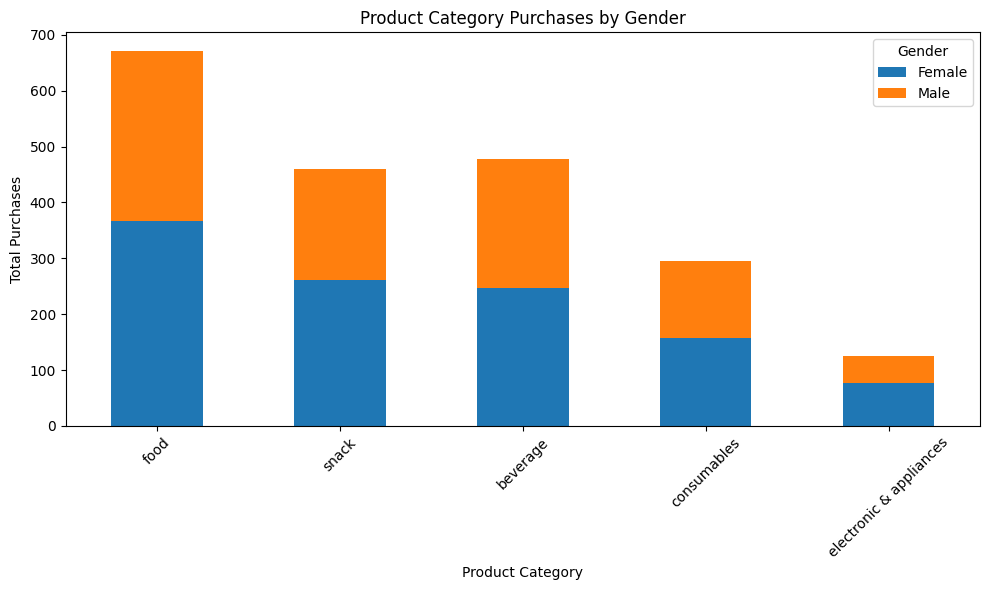

In [21]:
# Define the product categories
product_categories = ['food', 'snack', 'beverage', 'consumables', 'electronic & appliances']

# Aggregate the data by summing purchases for each product category, grouped by gender
grouped_data = df.groupby('Gender')[product_categories].sum()

# Plotting the stacked bar plot
ax = grouped_data.T.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels
plt.title('Product Category Purchases by Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Display the plot
plt.tight_layout()
plt.show()

## Bivariate Analysis

<Axes: xlabel='Weekly_Income_in_`000 (ksh)', ylabel='Spending_Score_(1-100)'>

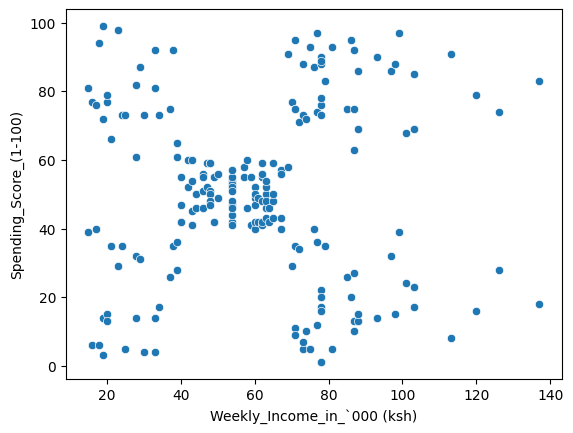

In [22]:
sns.scatterplot(data=df, x='Weekly_Income_in_`000 (ksh)',y='Spending_Score_(1-100)' )

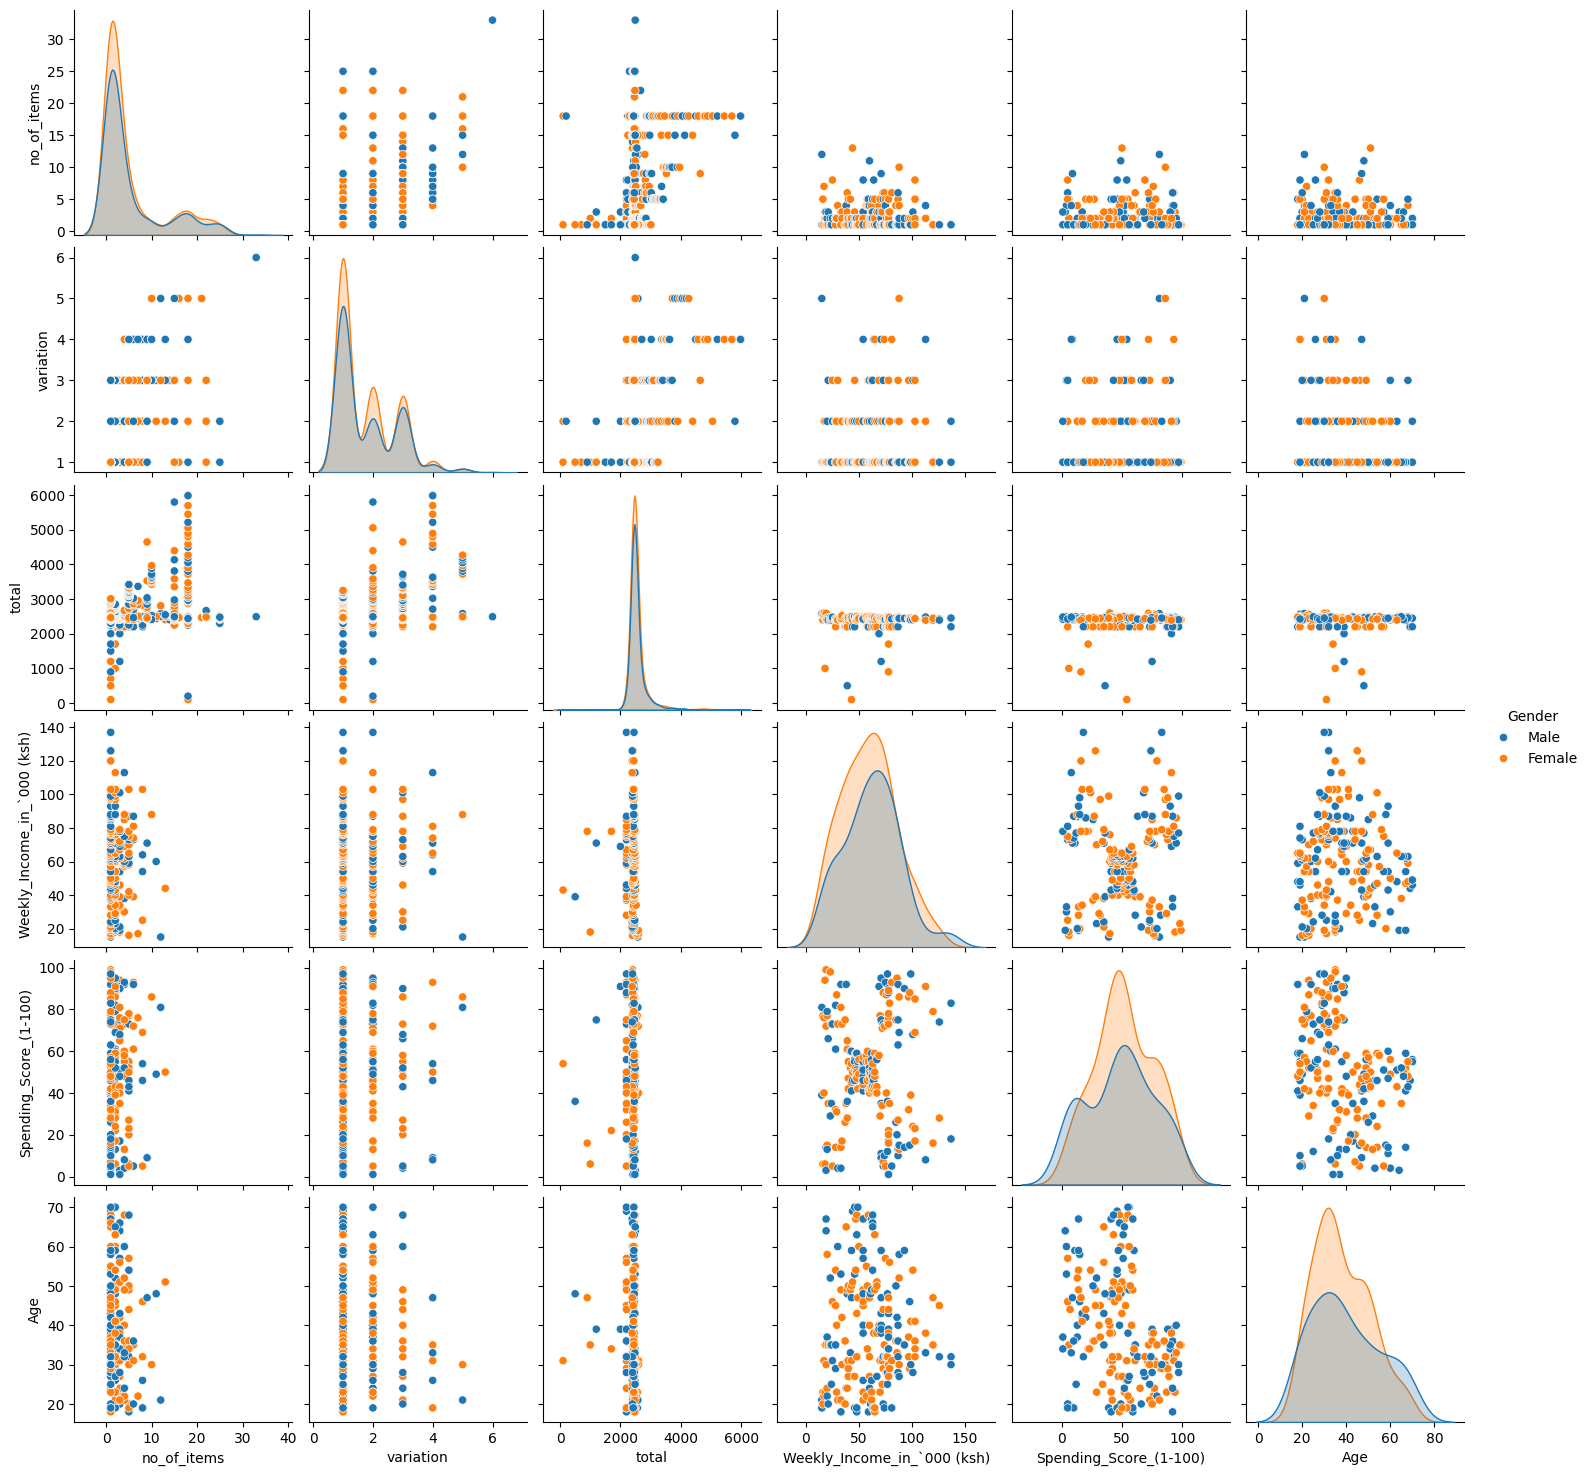

In [23]:
df = df.drop([  'paid', 'change', 'food', 'snack', 'beverage', 
              'consumables', 'electronic & appliances', 'day_1', 'month', 'year'], axis=1)
sns.pairplot(df,hue='Gender')

In [24]:
# Group the DataFrame by the 'Gender' column
# Then, for each gender group, calculate the mean of 'Age', 'Weekly_Income_in_`000 (ksh)', and 'Spending_Score_(1-100)'
# This helps compare the average age, income, and spending score between male and female shoppers
df.groupby(['Gender'])[['Age', 'Weekly_Income_in_`000 (ksh)', 'Spending_Score_(1-100)']].mean()


,Age,Weekly_Income_in_`000 (ksh),Spending_Score_(1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [25]:

df[['Age', 'Weekly_Income_in_`000 (ksh)', 'Spending_Score_(1-100)']].corr()


,Age,Weekly_Income_in_`000 (ksh),Spending_Score_(1-100)
Age,1.000000,-0.012398,-0.327227
Weekly_Income_in_`000 (ksh),-0.012398,1.000000,0.009903
Spending_Score_(1-100),-0.327227,0.009903,1.000000


<Axes: >

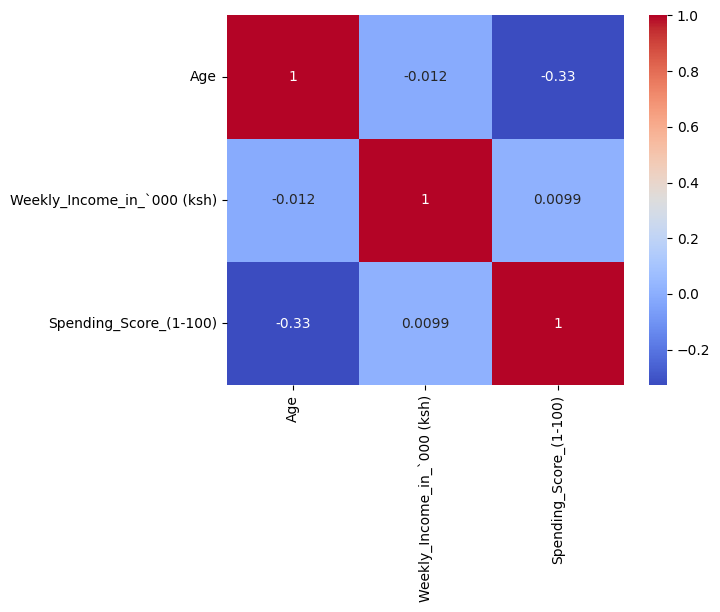

In [26]:
sns.heatmap(df[['Age', 'Weekly_Income_in_`000 (ksh)', 'Spending_Score_(1-100)']].corr(),annot=True,cmap='coolwarm')

## Clustering - Univariate, Bivariate, Multivariate

In [27]:
clustering1 = KMeans(n_clusters=3)

In [28]:

df_cleaned = df.dropna(subset=['Weekly_Income_in_`000 (ksh)'])
clustering1.fit(df_cleaned[['Weekly_Income_in_`000 (ksh)']])


KMeans(n_clusters=3)

In [29]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [30]:
df_cleaned = df[['Weekly_Income_in_`000 (ksh)', 'Spending_Score_(1-100)', 'Age']].dropna()

# Fit K-Means on the FULL dataset
kmeans = KMeans(n_clusters=5, random_state=42)
df_cleaned['Income Cluster'] = kmeans.fit_predict(df_cleaned)

# Assign back to the original DataFrame
df.loc[df_cleaned.index, 'Income Cluster'] = df_cleaned['Income Cluster']

df.head()


,supermarket,no_of_items,variation,total,Payment Method,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,Gender,Weekly_Income_in_`000 (ksh),Spending_Score_(1-100),Age,Income Cluster
0,nakumatt,1,1,2560,card,2016-11-11,yes,08:16:00,morning,chain,kilimani,high,Friday,weekday,no,Male,15.0,39.0,19.0,2.0
1,nakumatt,12,5,2580,card,2016-11-11,yes,08:44:00,morning,chain,kilimani,high,Friday,weekday,no,Male,15.0,81.0,21.0,2.0
2,nakumatt,5,1,2397,mpesa,2017-01-13,yes,17:40:00,afternoon,chain,kilimani,high,Friday,weekday,no,Female,16.0,6.0,20.0,0.0
3,naivas,1,1,2561,cash,2017-05-19,no,20:10:00,night,chain,umoja,mid,Friday,weekday,no,Female,16.0,77.0,23.0,2.0
4,naivas,1,1,2598,cash,2017-05-19,no,15:16:00,afternoon,chain,umoja,mid,Friday,weekday,no,Female,17.0,40.0,31.0,0.0


In [31]:
df['Income Cluster'].value_counts()

Income Cluster
0.0    89
3.0    38
4.0    33
2.0    29
1.0    11
Name: count, dtype: int64

In [32]:
clustering1.inertia_

25640.457784396833

In [33]:
df_cleaned = df.dropna(subset=['Weekly_Income_in_`000 (ksh)'])
intertia_scores = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_cleaned[['Weekly_Income_in_`000 (ksh)']])
    intertia_scores.append(kmeans.inertia_)

In [34]:
intertia_scores

[137277.28000000003,
 49761.73701298701,
 25640.457784396833,
 13556.829274891777,
 8667.679614837509,
 5081.484660267269,
 4237.491459417776,
 2871.629365079366,
 2309.690170940171,
 1903.203354978355]

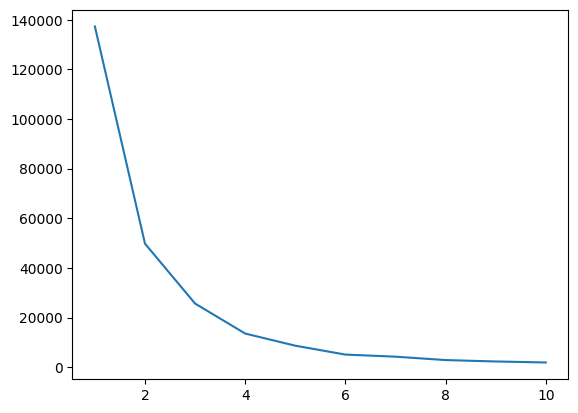

In [35]:
plt.plot(range(1,11),intertia_scores)

In [36]:
df.groupby('Income Cluster')[ ['Weekly_Income_in_`000 (ksh)',
       'Spending_Score_(1-100)' ,'Age']].mean()

,Weekly_Income_in_`000 (ksh),Spending_Score_(1-100),Age
Income Cluster,,,
0.0,47.719101,41.797753,46.213483
1.0,108.181818,82.727273,32.454545
2.0,29.586207,73.655172,24.689655
3.0,87.000000,18.631579,40.394737
4.0,76.090909,77.757576,31.787879


## Bivariate Clustering

In [37]:

# Define the K-Means model
clustering2 = KMeans(n_clusters=5, random_state=42)  # Choose n_clusters based on your analysis

# Fit the model on the selected columns
clustering2.fit(df_cleaned[['Weekly_Income_in_`000 (ksh)', 'Spending_Score_(1-100)']])

# Assign cluster labels
df_cleaned['Spending and Income Cluster'] = clustering2.labels_
df_cleaned.head()


,supermarket,no_of_items,variation,total,Payment Method,date,mall,time,time_type,type_market,...,loc_category,day,day_type,24hr,Gender,Weekly_Income_in_`000 (ksh),Spending_Score_(1-100),Age,Income Cluster,Spending and Income Cluster
0,nakumatt,1,1,2560,card,2016-11-11,yes,08:16:00,morning,chain,...,high,Friday,weekday,no,Male,15.0,39.0,19.0,2.0,4
1,nakumatt,12,5,2580,card,2016-11-11,yes,08:44:00,morning,chain,...,high,Friday,weekday,no,Male,15.0,81.0,21.0,2.0,2
2,nakumatt,5,1,2397,mpesa,2017-01-13,yes,17:40:00,afternoon,chain,...,high,Friday,weekday,no,Female,16.0,6.0,20.0,0.0,4
3,naivas,1,1,2561,cash,2017-05-19,no,20:10:00,night,chain,...,mid,Friday,weekday,no,Female,16.0,77.0,23.0,2.0,2
4,naivas,1,1,2598,cash,2017-05-19,no,15:16:00,afternoon,chain,...,mid,Friday,weekday,no,Female,17.0,40.0,31.0,0.0,4


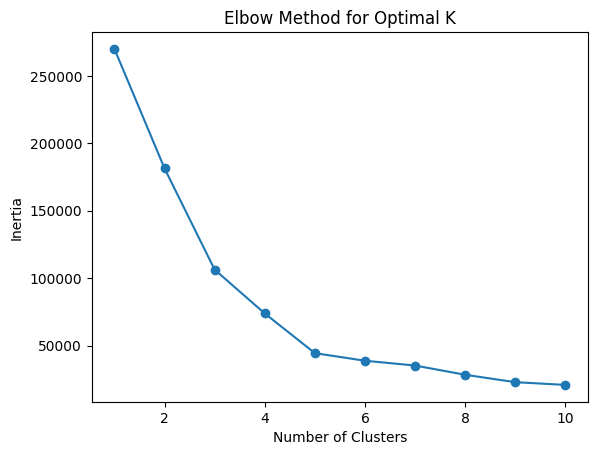

In [38]:
df_cleaned = df.dropna(subset=['Weekly_Income_in_`000 (ksh)', 'Spending_Score_(1-100)'])

# Run K-Means on the cleaned dataset
intertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df_cleaned[['Weekly_Income_in_`000 (ksh)', 'Spending_Score_(1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

# Plot the Elbow Method
import matplotlib.pyplot as plt
plt.plot(range(1, 11), intertia_scores2, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [39]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

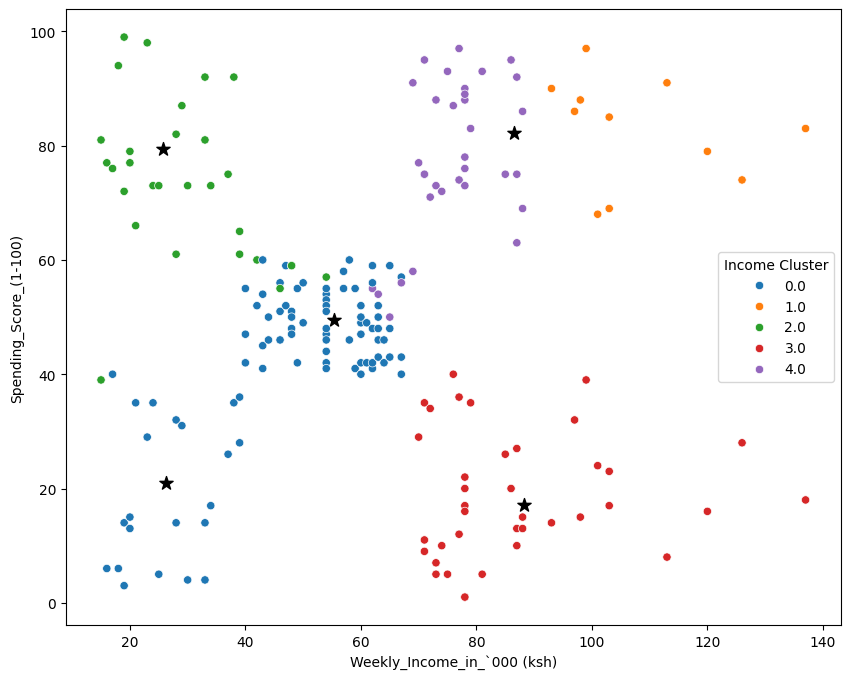

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Weekly_Income_in_`000 (ksh)',y='Spending_Score_(1-100)',hue='Income Cluster' ,palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [41]:
df.to_csv("clustered_data.csv", index=False)


In [42]:
# Group by location and supermarket, then count occurrences
supermarket_counts = df.groupby(["location", "supermarket"]).size().reset_index(name="count")

# Get the supermarket with the highest count per location
top_supermarkets = supermarket_counts.loc[supermarket_counts.groupby("location")["count"].idxmax()]

# Display the result
top_supermarkets

,location,supermarket,count
0,Westlands,Carrefour,196
7,cbd,karrymart,205
13,donholm,tuskys,29
14,junction,nakumatt,37
16,karen,nakumatt,15
17,kilimani,nakumatt,25
19,saika,acacia,53
20,umoja,naivas,42


In [43]:
# Group by location and cluster, then count occurrences
cluster_counts = df.groupby(["location", "Income Cluster"]).size().reset_index(name="count")

# Get the most common cluster per location
top_clusters = cluster_counts.loc[cluster_counts.groupby("location")["count"].idxmax()]


## Visualization of the Outputs and Clusters 

In [44]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


In [45]:
# Load customer segmentation data
df = pd.read_csv(r"C:\Users\JOSHUA\clustered_data.csv")

# Load Nairobi County boundary (GeoJSON)
nairobi_map = gpd.read_file(r"C:\Users\JOSHUA\OneDrive\Desktop\4.2\Context Maps\Shapefiles\NairobiCounty.shp")



In [46]:
# Dictionary with approximate coordinates for different locations in Nairobi
location_coords = {
    "cbd": [ -1.286389, 36.817223],
    "Westlands": [-1.2683, 36.8050],
    "kilimani": [-1.2921, 36.7818],
    "Karen": [-1.3467, 36.7167],
    "umoja": [-1.274357,36.905729],
    "donholm": [ -1.291954, 36.897663],
    "junction": [-1.298489, 36.7624734],
    "saika": [-1.252897,36.913794],
}

# Map the coordinates to your DataFrame
df["latitude"] = df["location"].map(lambda x: location_coords.get(x, [None, None])[0])
df["longitude"] = df["location"].map(lambda x: location_coords.get(x, [None, None])[1])


KeyboardInterrupt: 

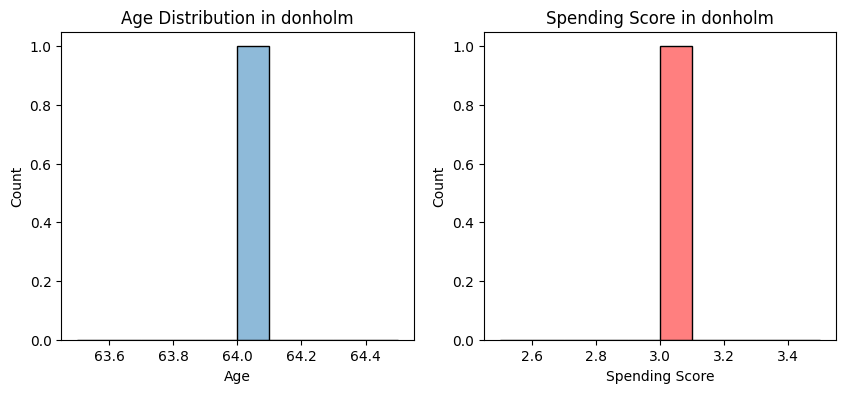

In [47]:
import base64
from io import BytesIO
import folium
import seaborn as sns
import matplotlib.pyplot as plt

# Cluster descriptions mapping
cluster_descriptions = {
    0: "Moderate Young Shoppers",
    1: "Premium Shoppers",
    2: "Frequent Budget Buyers",
    3: "Infrequent or Impulse Buyers"
}

# Function to generate demographic graphs and encode them as images
def generate_demographic_plot(location):
    # Filter data for the selected location
    filtered_data = df[df["location"] == location]
    
    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Plot Age Distribution
    sns.histplot(filtered_data["Age"], bins=10, kde=True, ax=axes[0])
    axes[0].set_title(f"Age Distribution in {location}")
    axes[0].set_xlabel("Age")
    
    # Plot Spending Score
    sns.histplot(filtered_data["Spending_Score_(1-100)"], bins=10, kde=True, ax=axes[1], color="red")
    axes[1].set_title(f"Spending Score in {location}")
    axes[1].set_xlabel("Spending Score")

    # Save the plot to a PNG image in memory
    img = BytesIO()
    plt.savefig(img, format="png", bbox_inches="tight")
    plt.close(fig)
    img.seek(0)

    # Encode the image in Base64
    return base64.b64encode(img.getvalue()).decode()

# Create the base map centered in Nairobi
nairobi_map = folium.Map(location=[-1.286389, 36.817223], zoom_start=12)

# Add markers for each location
for _, row in df.dropna(subset=["latitude", "longitude"]).iterrows():
    location = row["location"]

    # Get the most common supermarket for this location
    top_supermarket = top_supermarkets[top_supermarkets["location"] == location]["supermarket"].values
    top_supermarket_str = top_supermarket[0] if len(top_supermarket) > 0 else "No data"

    # Get encoded image for the demographic graph
    encoded_image = generate_demographic_plot(location)
    img_html = f'<img src="data:image/png;base64,{encoded_image}" width="400px">'
    
    # Get the most common income cluster for this location
    top_cluster = top_clusters[top_clusters["location"] == location]["Income Cluster"].values
    if len(top_cluster) > 0:
        top_cluster_num = int(top_cluster[0])
        top_cluster_str = top_cluster_num
        cluster_desc = cluster_descriptions.get(top_cluster_num, "Other")
    else:
        top_cluster_str = "No data"
        cluster_desc = "No data"
    
    # Define the popup content
    popup_content = f"""
    <h4>Location: {location}</h4>
    <p><b>Major Customer Cluster:</b> {top_cluster_str} – {cluster_desc}</p>
    <p><b>Most common supermarket:</b> {top_supermarket_str}</p>
       {img_html}
    """

    # Add marker with pop-up
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=folium.Popup(popup_content, max_width=450),
        icon=folium.Icon(color="blue")
    ).add_to(nairobi_map)

# Show the map
nairobi_map

## Testing And Validating the model

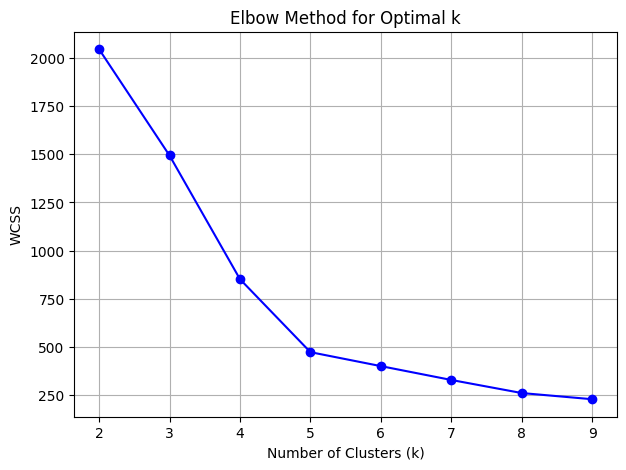

Silhouette Score: 0.907
Davies-Bouldin Index: 0.778


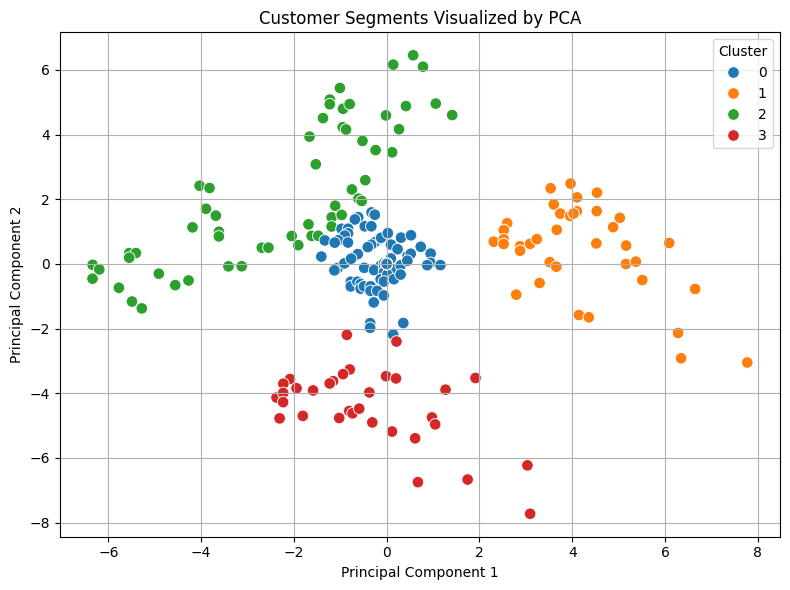

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv(r"C:\Users\JOSHUA\clustered_data.csv")

# Select relevant features
features = ['Weekly_Income_in_`000 (ksh)', 'Spending_Score_(1-100)']
df_selected = df[features]

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_selected)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

# Find optimal k using Elbow Method
wcss = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(7, 5))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Fit optimal KMeans model (assume k=4)
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Evaluation Metrics
silhouette = silhouette_score(X_scaled, cluster_labels)
db_index = davies_bouldin_score(X_scaled, cluster_labels)

print(f'Silhouette Score: {silhouette:.3f}')
print(f'Davies-Bouldin Index: {db_index:.3f}')

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# PCA for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=70)
plt.title('Customer Segments Visualized by PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
